In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handle the Missing Values

In [3]:
# Number of Missing value in each feature
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Embarked columns has very few missing values as compared to the size of the dataset Thus drop it
print("initial Shape was ",df.shape)
df.drop(df[df["Embarked"].isnull()].index,inplace = True)
print("After Dropping the NaN rows in Embarked Columns the shape is ", df.shape)

initial Shape was  (891, 12)
After Dropping the NaN rows in Embarked Columns the shape is  (889, 12)


C:\Users\KESHAV SINGHANIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

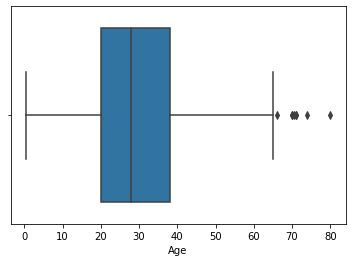

In [20]:
# Handle Missing values in Age Column whuch is a Continuous variable
sns.boxplot("Age", data=df)

In [22]:
# The above graph shows the presence of Outliers, Thus replacing with mean wont be an ideal solution
# Therefore Replacing with median
print("The median of Age feature is: ", df["Age"].median())
df["Age"].fillna(df["Age"].median(),inplace = True)

The median of Age feature is:  28.0


In [24]:
print("The Number of missing values now in the Age feature is ",df.Age.isnull().sum())

The Number of missing values now in the Age feature is  0


## Normalization

#### Z-Score Scaling -1 to 1

In [37]:
print("The Standard Deviation is",df["Age"].std())

The Standard Deviation is 12.984932293690774


In [35]:
print("The Mean is",df["Age"].mean())

The Mean is 29.315151856017994


In [38]:
df['Age_new'] =  (df["Age"] - df["Age"].mean())/df["Age"].std()

In [39]:
# Results
df["Age_new"].head()

0   -0.563357
1    0.668840
2   -0.255308
3    0.437803
4    0.437803
Name: Age_new, dtype: float64

In [43]:
df['Age_new'].std()
# Approx standard deviation of 1 for standard Normal Distribution

0.9999999999999994

#### Min-Max Scaling

In [59]:
minimum = df['Age'].min()

In [60]:
maximum = df['Age'].max()

In [61]:
df.Age.describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [62]:
df["Age_minmax"] = (df["Age"] - minimum)/(maximum - minimum)

In [63]:
df['Age_minmax'].head()

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: Age_minmax, dtype: float64

### Binning

In [70]:
from sklearn.preprocessing import KBinsDiscretizer 
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
               [  6., 3., 11 ]])
binning = KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [71]:
binning.transform(X)
# One Hot Encoded Output

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

#### Normalization by Decimal Scaling

In [83]:
maximum = df["Age"].max()

In [84]:
maximum

80.0

In [85]:
i = 1
while maximum>0:
    maximum = maximum%(10**i)
    i+=1
print(i)

2


In [86]:
df["Age_decimal"] = df['Age']/10**i
df["Age_decimal"].head()

0    0.22
1    0.38
2    0.26
3    0.35
4    0.35
Name: Age_decimal, dtype: float64

## Regression

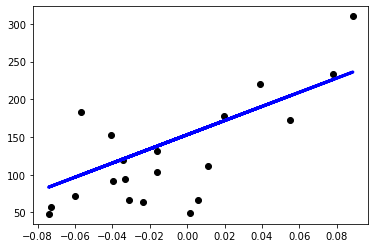

In [74]:
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)



plt.show()